In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
sns.set(style = "ticks", rc={'figure.figsize':(10,10),"xtick.major.size": 8, "ytick.major.size": 8},font_scale = 1.5)

# Functions

In [3]:
## Adjust graph spines
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 20))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

## correlation of multivariate analysis    
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

In [4]:
dat = pd.read_csv("cc6ec1db03b4f10f8de52c56ff48b085_3b9bae9bfadaf405f2ad9fceef832875_8.csv")

In [5]:
dat.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
dat.isna().sum(axis=0)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
ind_fea = dat.drop("Revenue",axis=1) ## independent variables
con_fea = dat.drop("Revenue",axis=1)

In [8]:
dat["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [9]:
dat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [10]:
ind_fea["Administrative_Duration"].value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
294.070513       1
90.875000        1
97.333333        1
53.166667        1
247.083333       1
Name: Administrative_Duration, Length: 3335, dtype: int64

# Exploratory data analysis

## Dependent variable distribution


----------------Distribution of Revenue----------------



C:\Users\xfu3\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


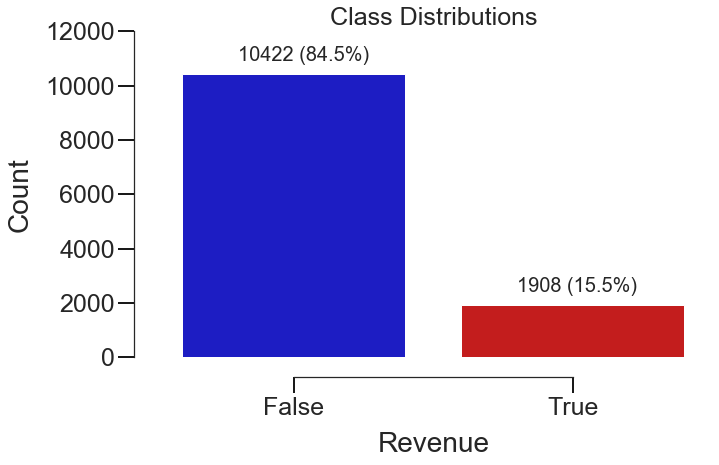

In [11]:
print('\n----------------Distribution of Revenue----------------\n')
plt.figure(figsize=(10,6))
colors = ["#0101DF", "#DF0101"]
ax = sns.countplot('Revenue', data=dat, palette=colors)

total = len(dat['Revenue'])
## set count and percentage labels above bars
for p in ax.patches:
        percentage = '{} ({:.1f}%)'.format(p.get_height(),100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/4 
        y = p.get_y() + p.get_height()+500
        ax.annotate(percentage, (x, y),size = 20)

ax.set_xlabel("Revenue",size = 28,labelpad=12)
ax.set_ylabel("Count",size = 28,labelpad=12)
ax.set_yticks([2000*i for i in range(7)])


ax.spines['bottom'].set_bounds(0, 1)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25)
ax.set_title('Class Distributions', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

## Distribution of independent variables (Numeric)

### Distribution of Administrative


----------------Distribution of Administrative----------------



C:\Users\xfu3\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x432 with 0 Axes>

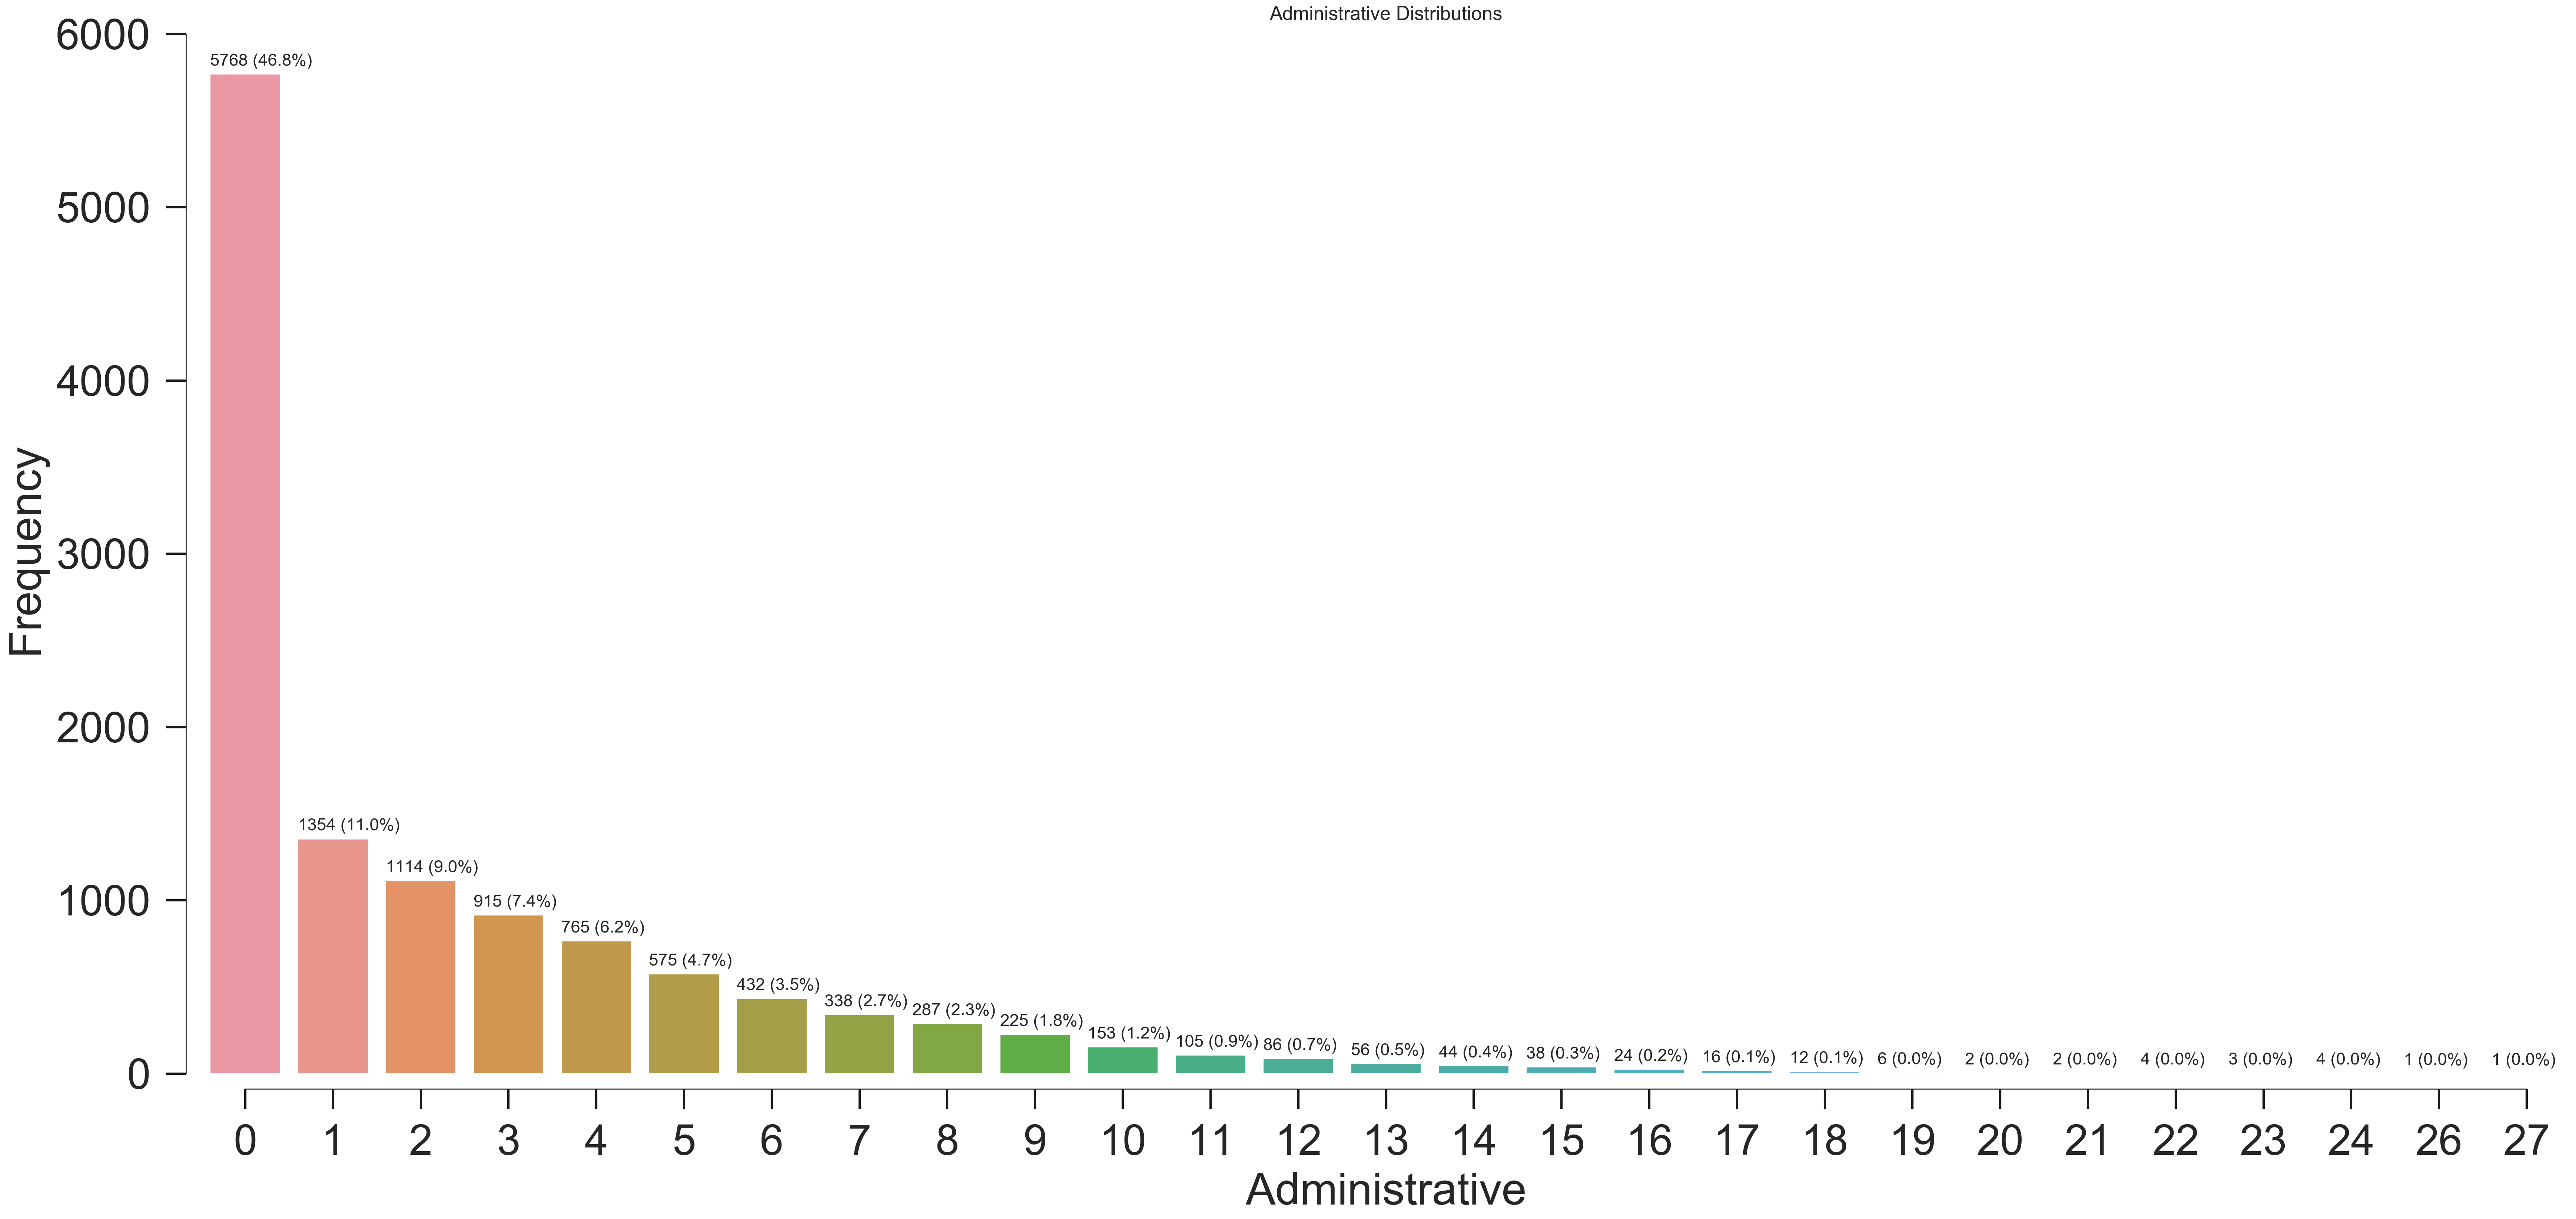

In [12]:
print('\n----------------Distribution of Administrative----------------\n')
plt.figure(figsize=(10,6))
fig = plt.figure(figsize=(55,25), dpi=150)
ax = sns.countplot('Administrative', data=dat)

total = len(dat['Administrative'])
## set count and percentage labels above bars
for p in ax.patches:
        percentage = '{} ({:.1f}%)'.format(p.get_height(),100 * p.get_height()/total)
        x = p.get_x()
        y = p.get_y() + p.get_height()+50
        ax.annotate(percentage, (x, y),size = 22)

        
ax.set_xlabel("Administrative",size = 58,labelpad=12)
ax.set_ylabel("Frequency",size = 58,labelpad=12)
ax.set_yticks([1000*i for i in range(7)])

ax.spines['bottom'].set_bounds(0, 26)
ax.tick_params(axis= "x",direction = 'out',which='major', length=26,width=3, color='k',labelsize = 55,pad = 20)
ax.tick_params(axis= "y",direction = 'out',which='major', length=26,width=3, color='k',labelsize = 55,pad= 20)
ax.set_title('Administrative Distributions', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

### Destribution of Administrative_Duration	

In [13]:
dat["Administrative_Duration"].value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
294.070513       1
90.875000        1
97.333333        1
53.166667        1
247.083333       1
Name: Administrative_Duration, Length: 3335, dtype: int64


----------------Distribution of Administrative_Duration----------------



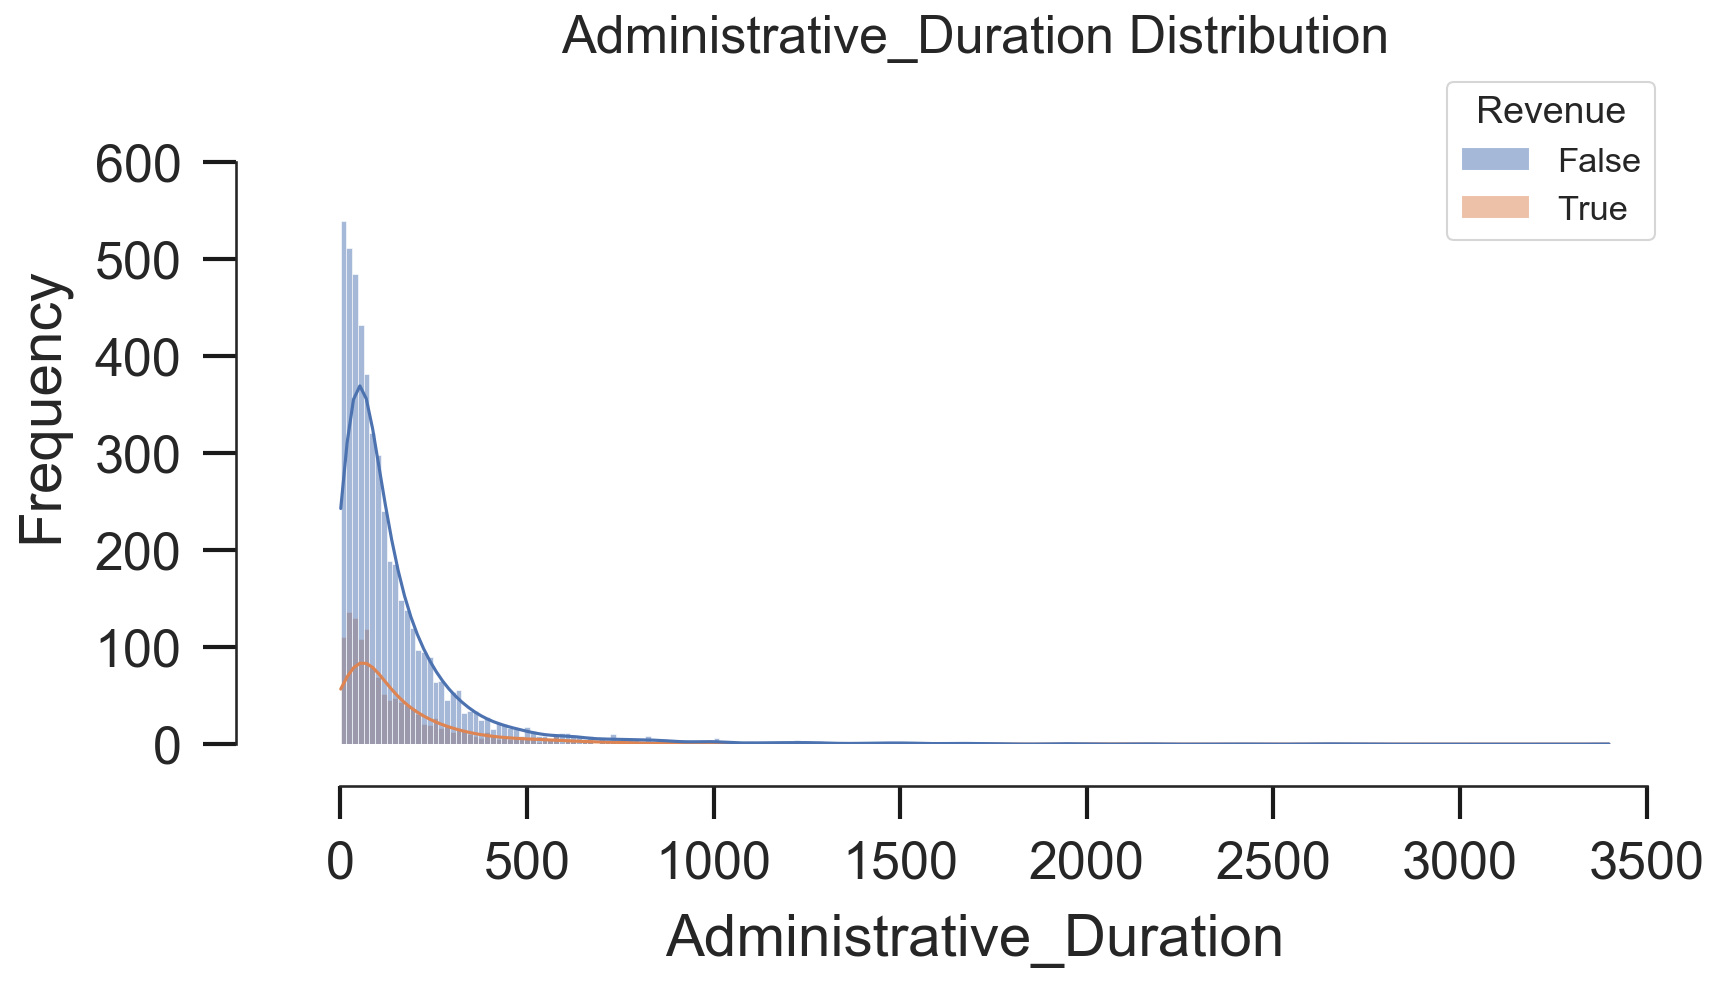

In [14]:
print('\n----------------Distribution of Administrative_Duration----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat.loc[dat["Administrative_Duration"]!=0,:], x="Administrative_Duration",hue = 'Revenue',kde = True)     
ax.set_xlabel("Administrative_Duration",size = 28,labelpad=12)
ax.set_ylabel("Frequency",size = 28,labelpad=12)
ax.set_yticks([100*i for i in range(8)])

ax.spines['bottom'].set_bounds(0,3500)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('Administrative_Duration Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

### Destribution of Informational

In [15]:
len(dat["Informational"].value_counts())

17


----------------Distribution of Informational----------------



C:\Users\xfu3\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x432 with 0 Axes>

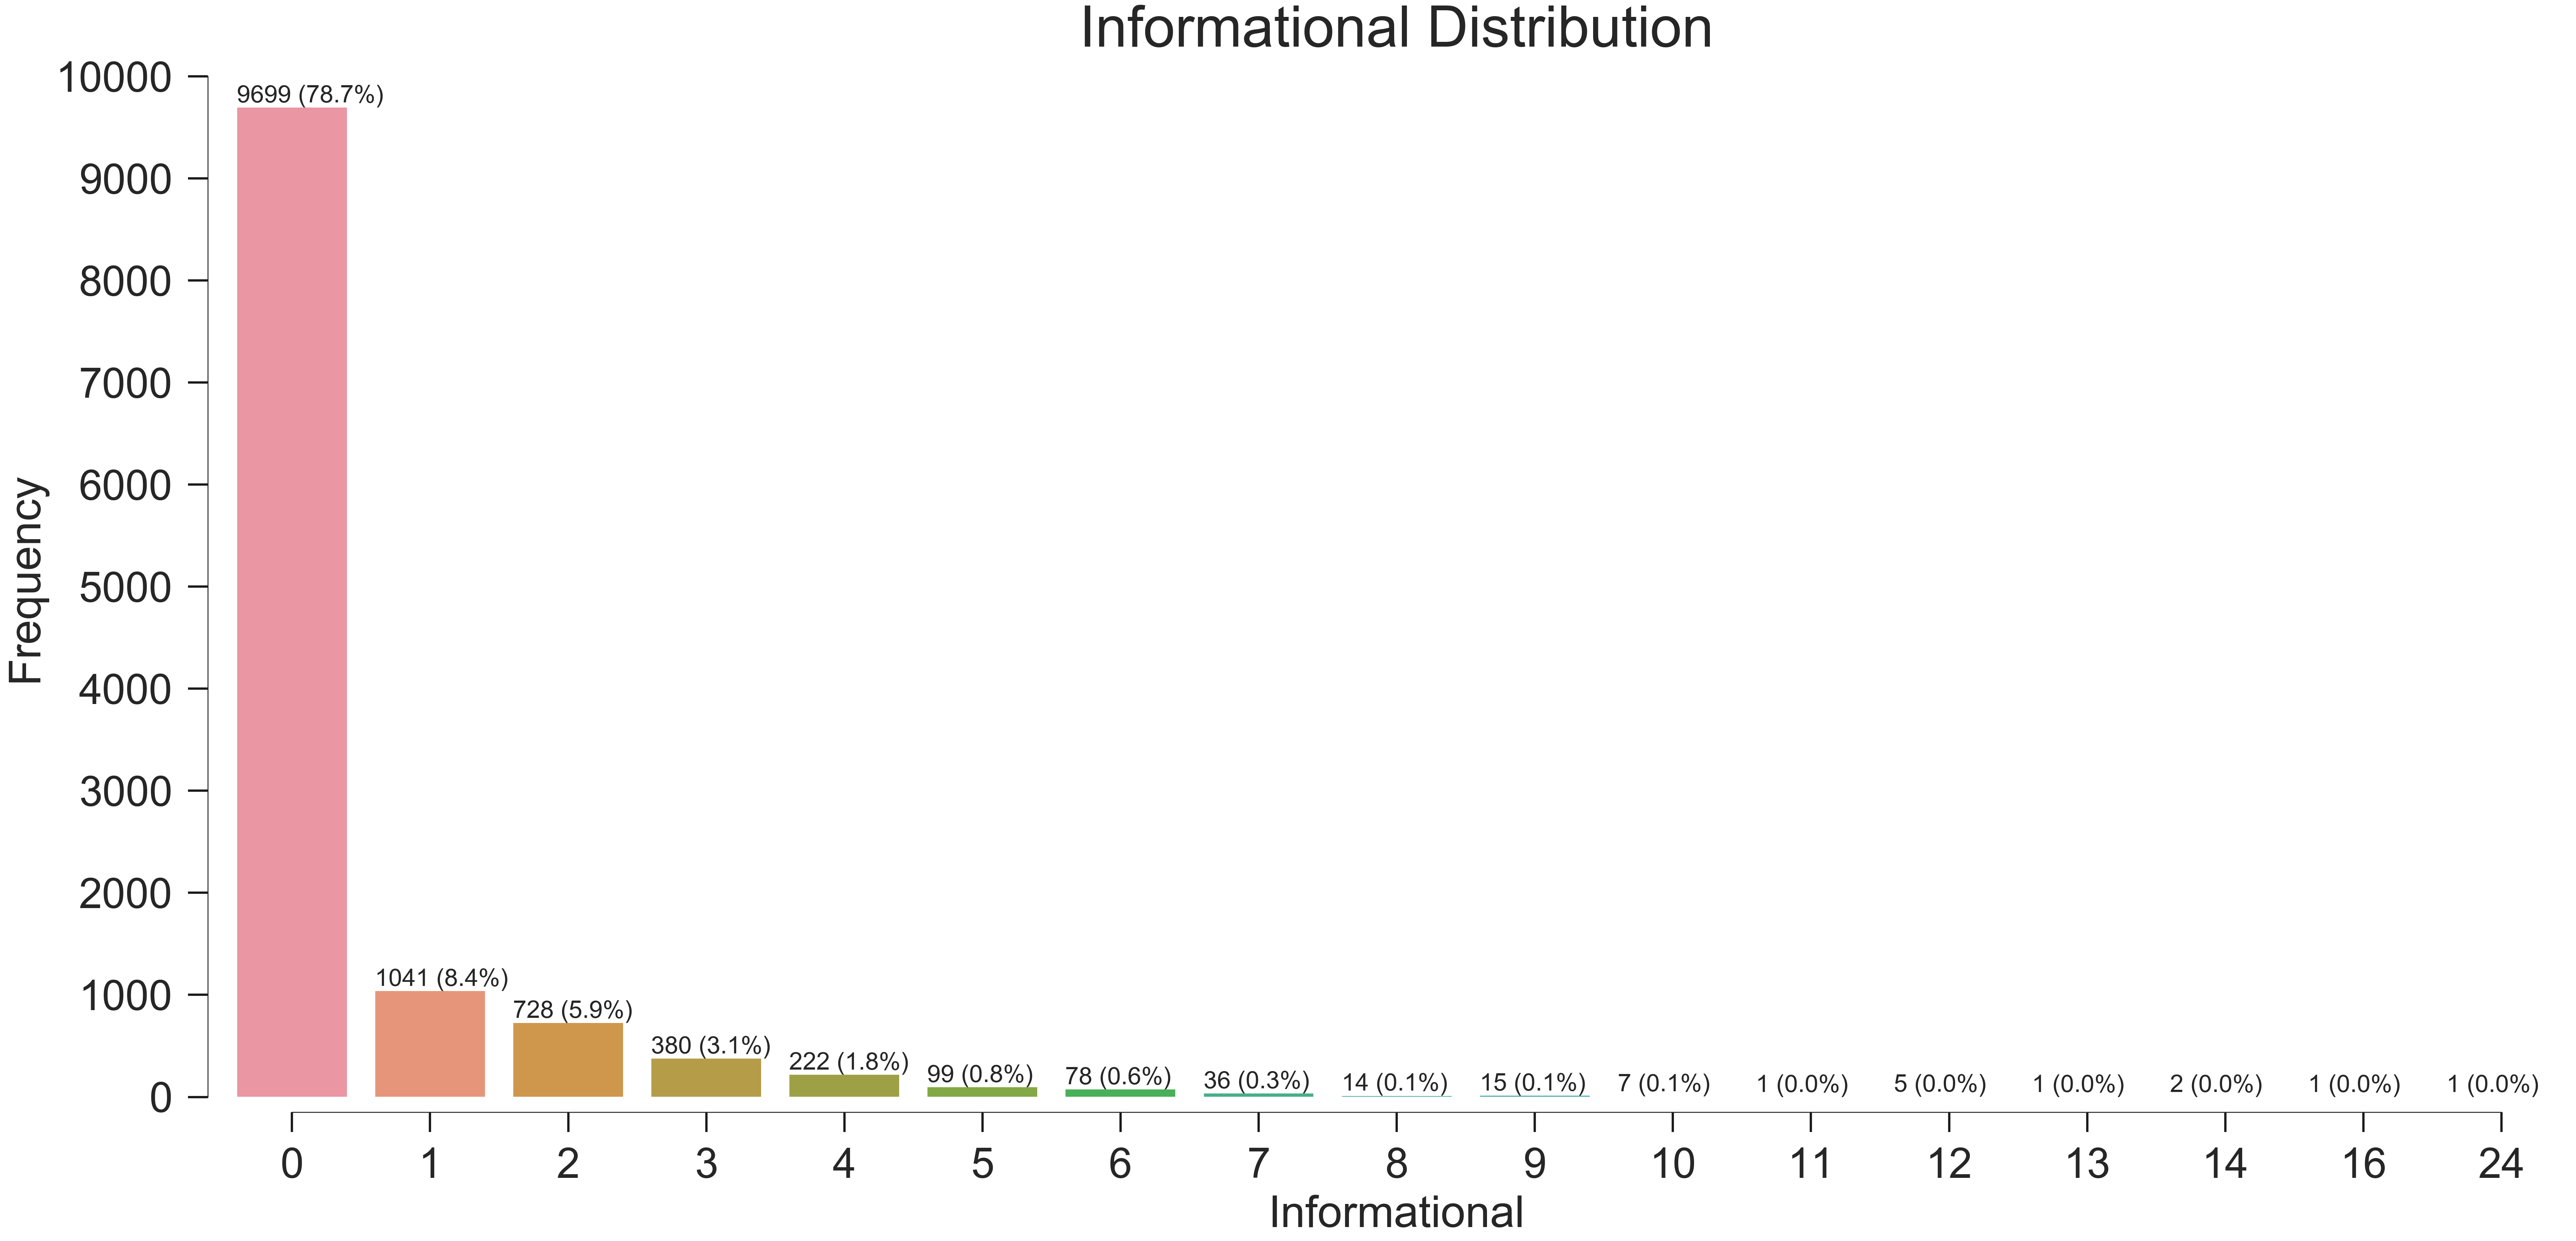

In [16]:
print('\n----------------Distribution of Informational----------------\n')
plt.figure(figsize=(10,6))
fig = plt.figure(figsize=(55,25), dpi=150)
ax = sns.countplot('Informational',x="Informational_Duration",data=dat)

total = len(dat['Informational'])
## set count and percentage labels above bars
for p in ax.patches:
        percentage = '{} ({:.1f}%)'.format(p.get_height(),100 * p.get_height()/total)
        x = p.get_x()
        y = p.get_y() + p.get_height()+50
        ax.annotate(percentage, (x, y),size = 32)

        
ax.set_xlabel("Informational",size = 58,labelpad=12)
ax.set_ylabel("Frequency",size = 58,labelpad=12)
ax.set_yticks([1000*i for i in range(11)])

ax.spines['bottom'].set_bounds(0, 16)
ax.tick_params(axis= "x",direction = 'out',which='major', length=26,width=3, color='k',labelsize = 55,pad = 20)
ax.tick_params(axis= "y",direction = 'out',which='major', length=26,width=3, color='k',labelsize = 55,pad= 20)
ax.set_title('Informational Distribution', fontsize=75)
adjust_spines(ax, ['left', 'bottom'])


plt.show()


----------------Distribution of Informational----------------



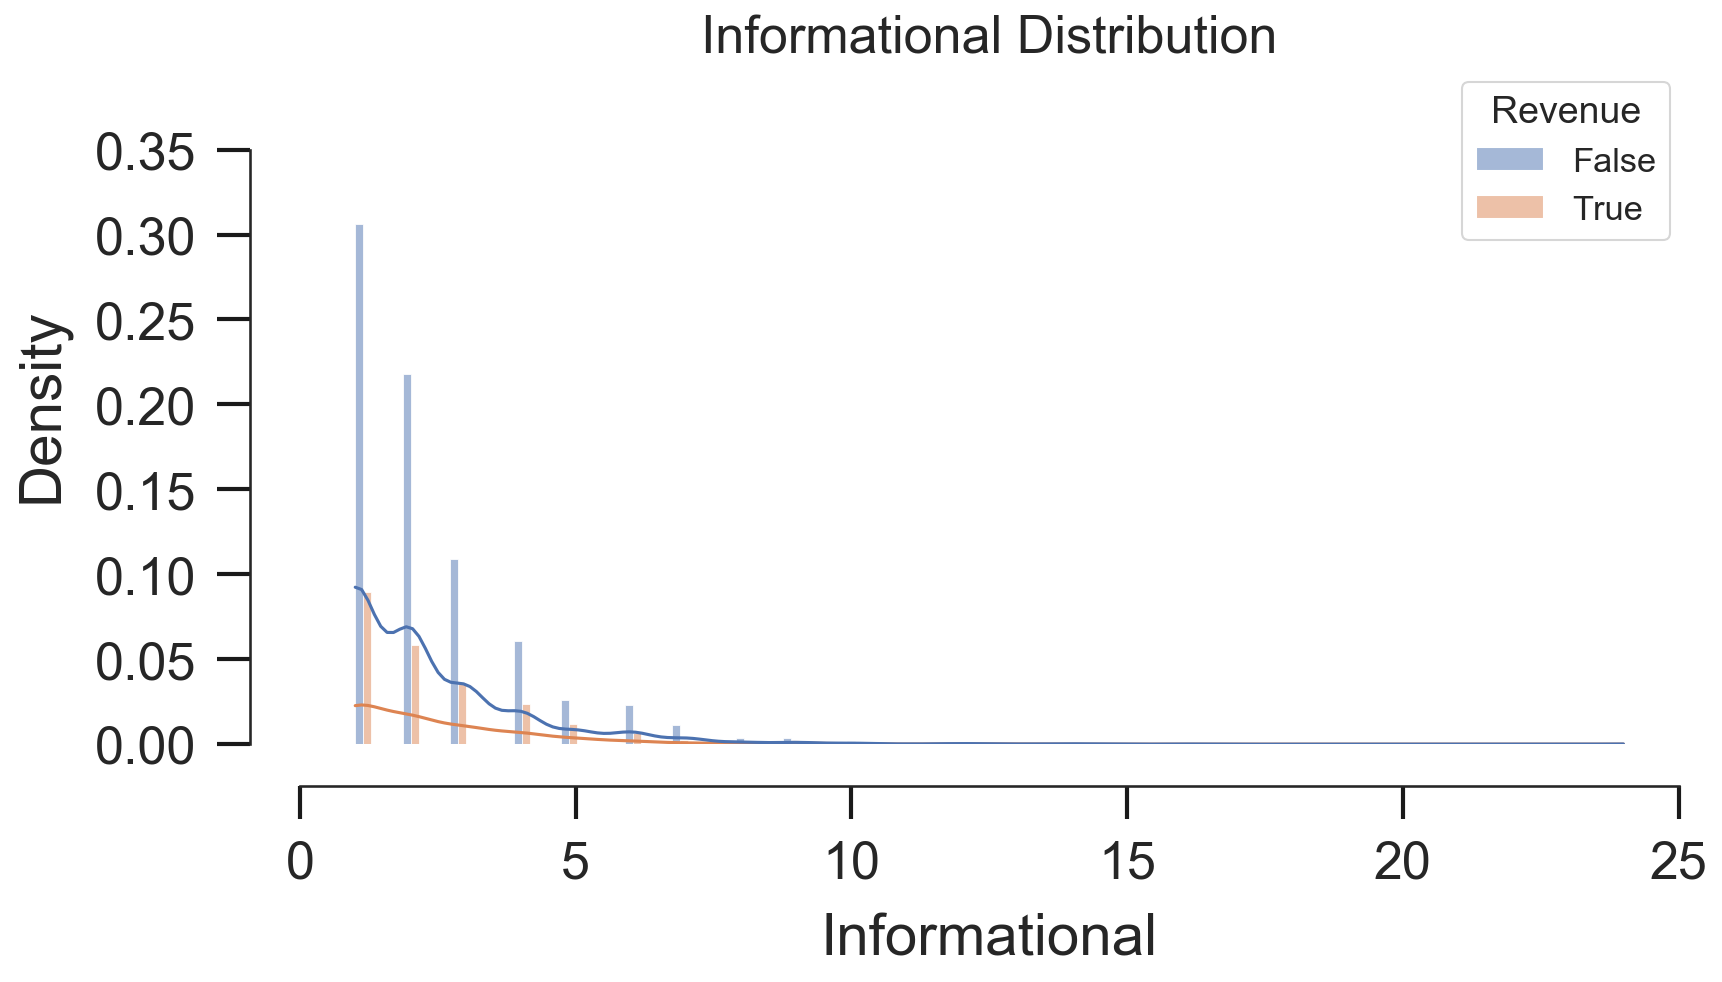

In [17]:
print('\n----------------Distribution of Informational----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat.loc[dat["Informational"]!=0,:], x="Informational",stat="probability",hue = 'Revenue', multiple="dodge",kde = True)     
ax.set_xlabel("Informational",size = 28,labelpad=12)
ax.set_ylabel("Density",size = 28,labelpad=12)
ax.set_yticks([0.05*i for i in range(9)])

#ax.spines['bottom'].set_bounds(0,24)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('Informational Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

### Distribution of Informational_Duration

In [18]:
dat["Informational_Duration"].value_counts()

0.0      9925
9.0        33
6.0        26
10.0       26
7.0        26
         ... 
291.5       1
43.2        1
338.4       1
86.6        1
145.6       1
Name: Informational_Duration, Length: 1258, dtype: int64


----------------Distribution of Administrative_Duration----------------



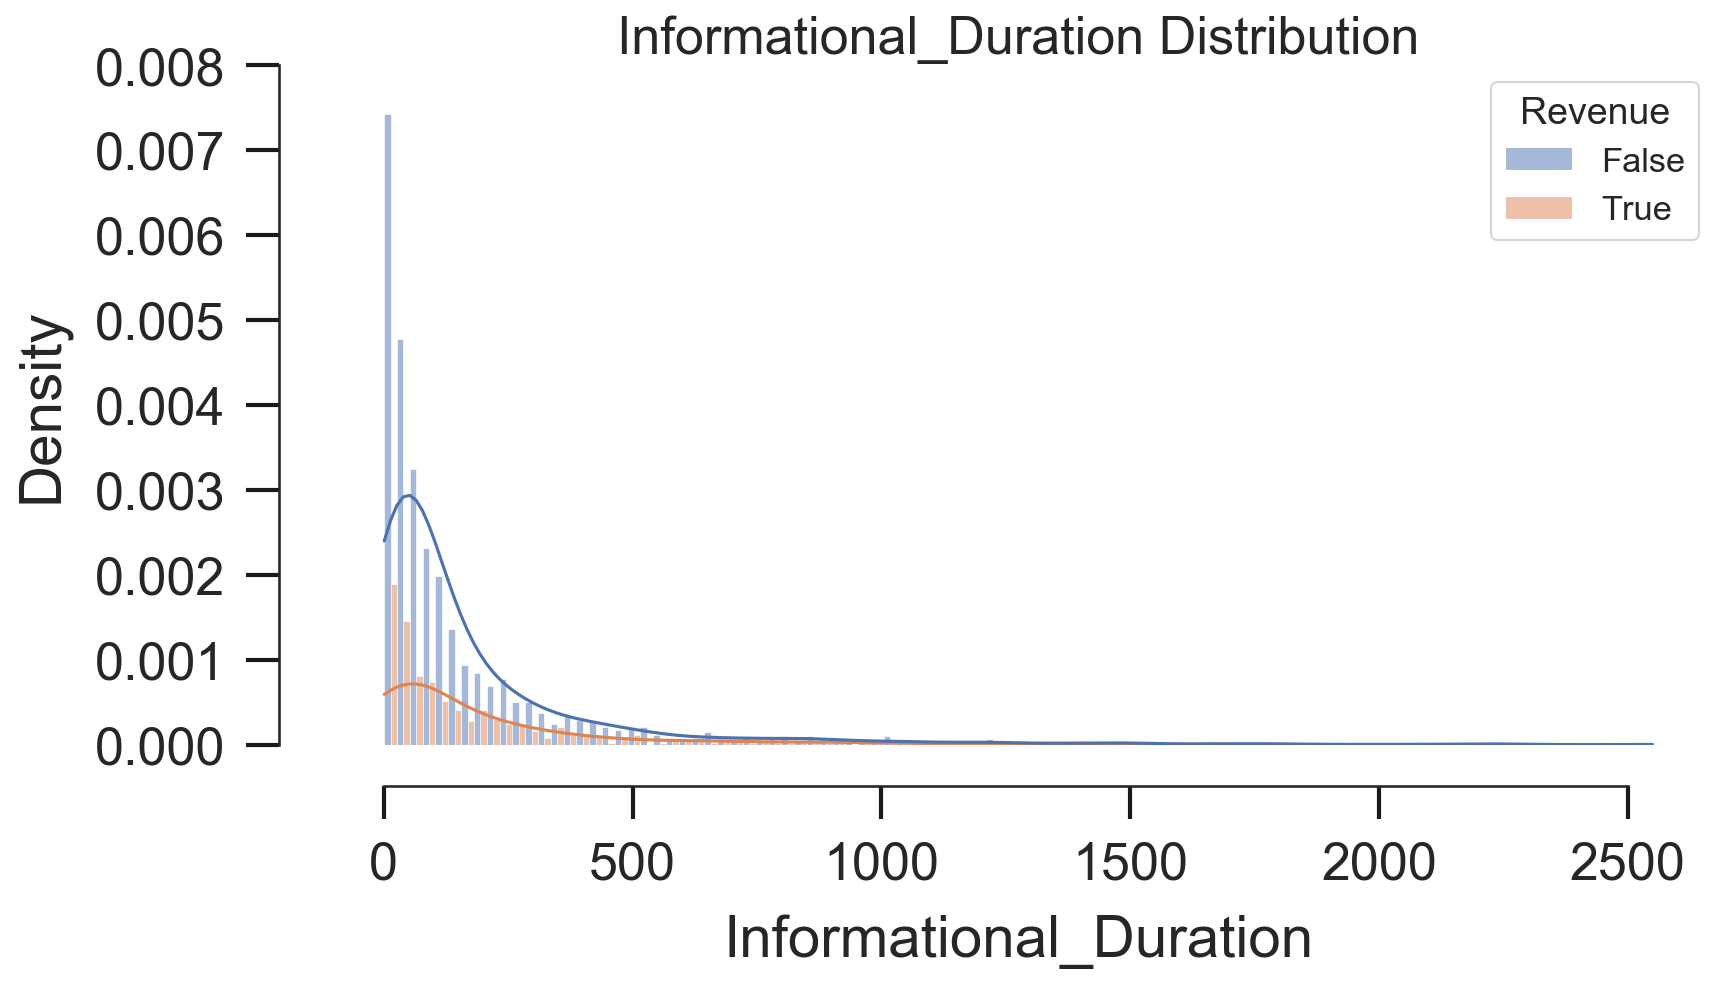

In [19]:
print('\n----------------Distribution of Administrative_Duration----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat.loc[dat["Informational_Duration"]!=0,:], x="Informational_Duration",stat="density",hue = 'Revenue', multiple="dodge",kde = True)     
ax.set_xlabel("Informational_Duration",size = 28,labelpad=12)
ax.set_ylabel("Density",size = 28,labelpad=12)
ax.set_yticks([0.001*i for i in range(9)])

ax.spines['bottom'].set_bounds(0,2500)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('Informational_Duration Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

### Distribution of ProductRelated


----------------Distribution of ProductRelated----------------



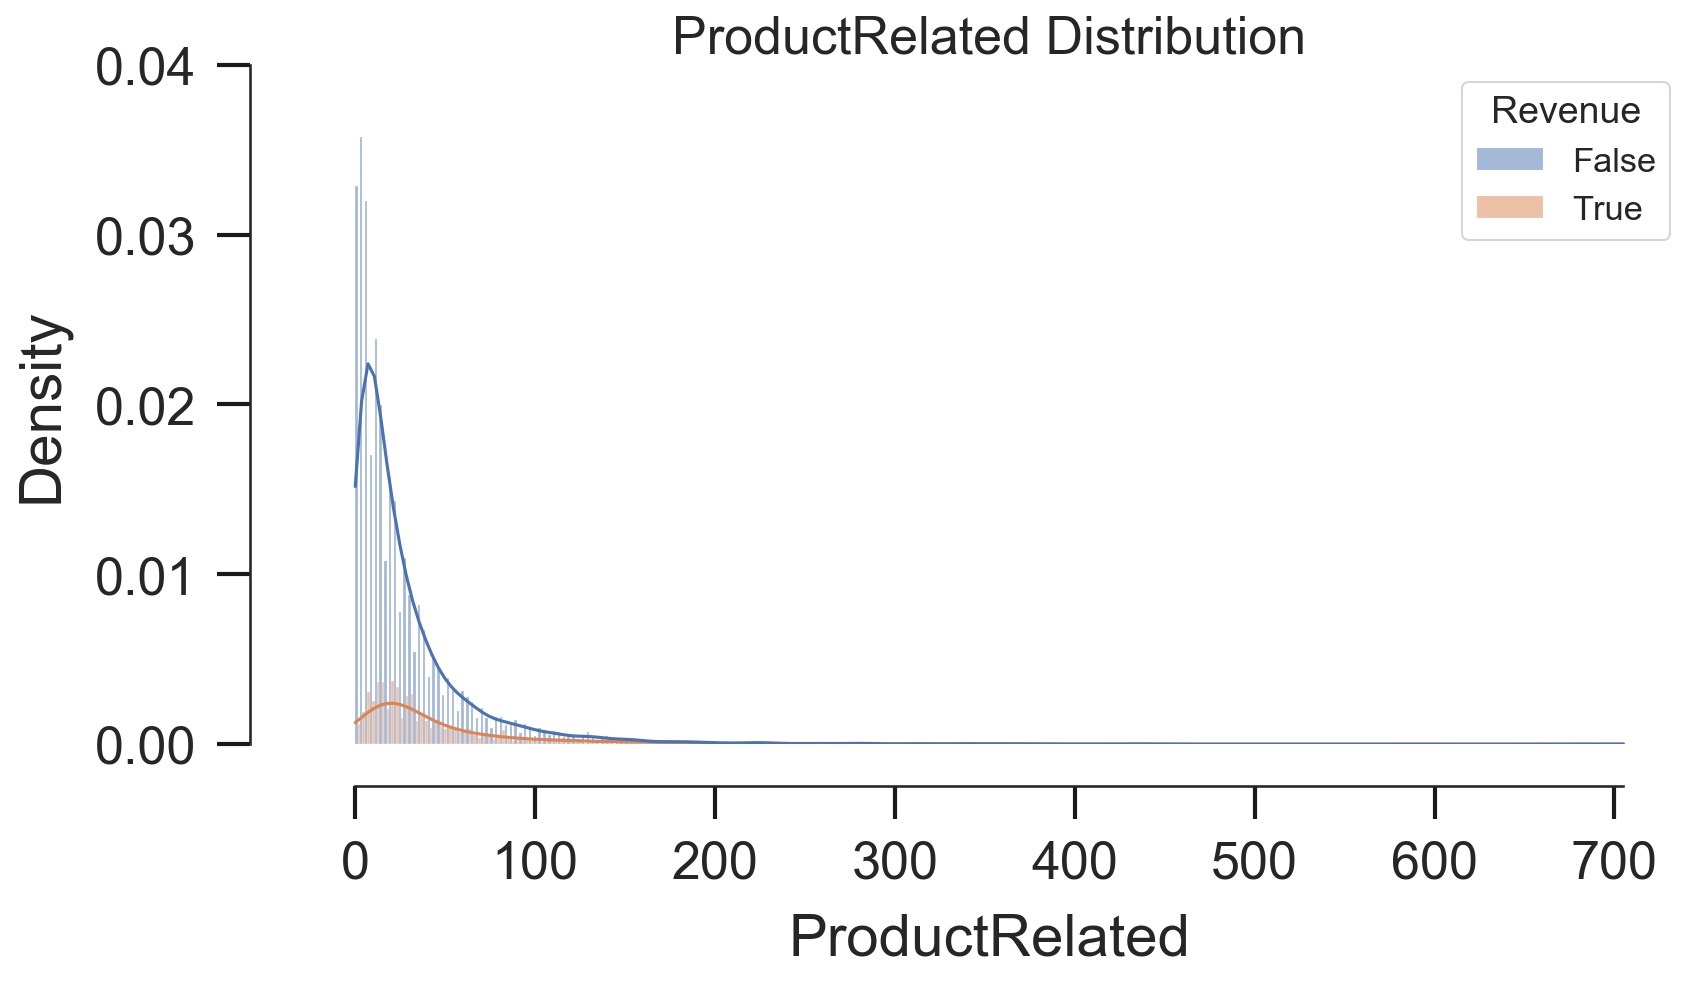

In [20]:
print('\n----------------Distribution of ProductRelated----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat, x="ProductRelated",stat="density",hue = "Revenue",multiple="dodge",kde = True)     
ax.set_xlabel("ProductRelated",size = 28,labelpad=12)
ax.set_ylabel("Density",size = 28,labelpad=12)
ax.set_yticks([0.01*i for i in range(5)])

#ax.spines['bottom'].set_bounds(0,700)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('ProductRelated Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

### Distribution of ProductRelated_Duration


----------------Distribution of ProductRelated_Duration----------------



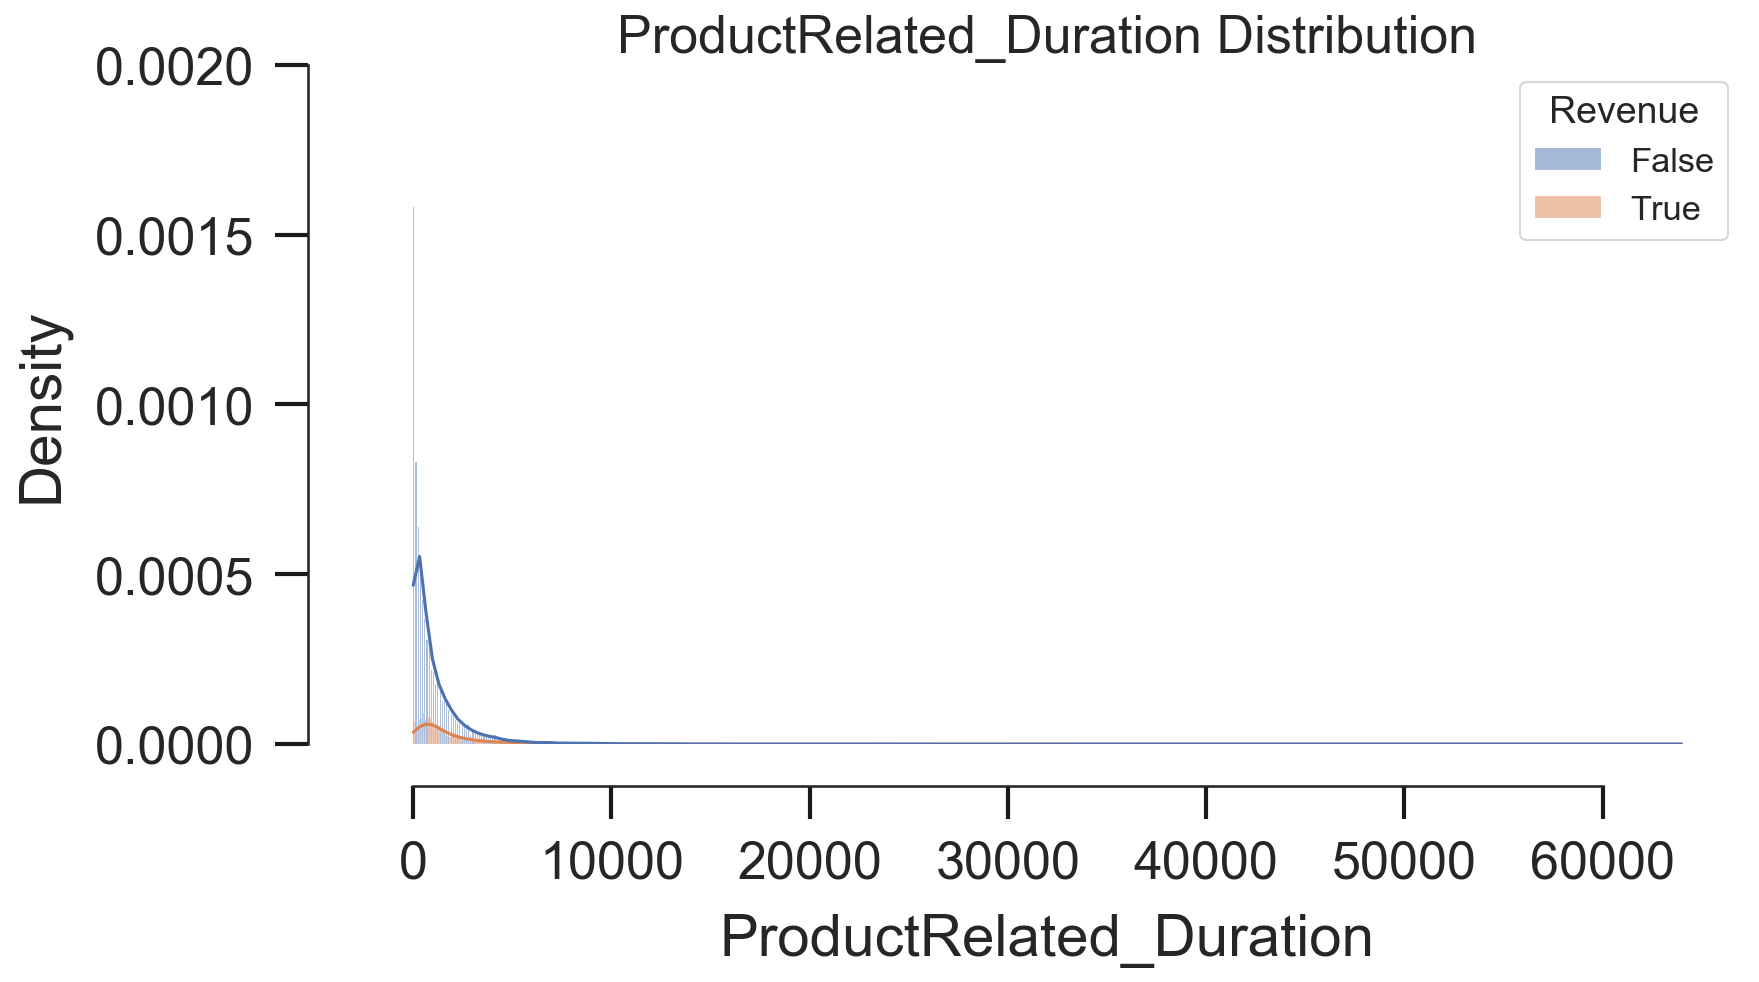

In [21]:
print('\n----------------Distribution of ProductRelated_Duration----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat, x="ProductRelated_Duration",hue = 'Revenue',stat="density", multiple="dodge",kde = True)     
ax.set_xlabel("ProductRelated_Duration",size = 28,labelpad=12)
ax.set_ylabel("Density",size = 28,labelpad=12)
ax.set_yticks([0.0005*i for i in range(5)])

ax.spines['bottom'].set_bounds(0,60000)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('ProductRelated_Duration Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()

### BounceRates


----------------Distribution of BounceRates----------------



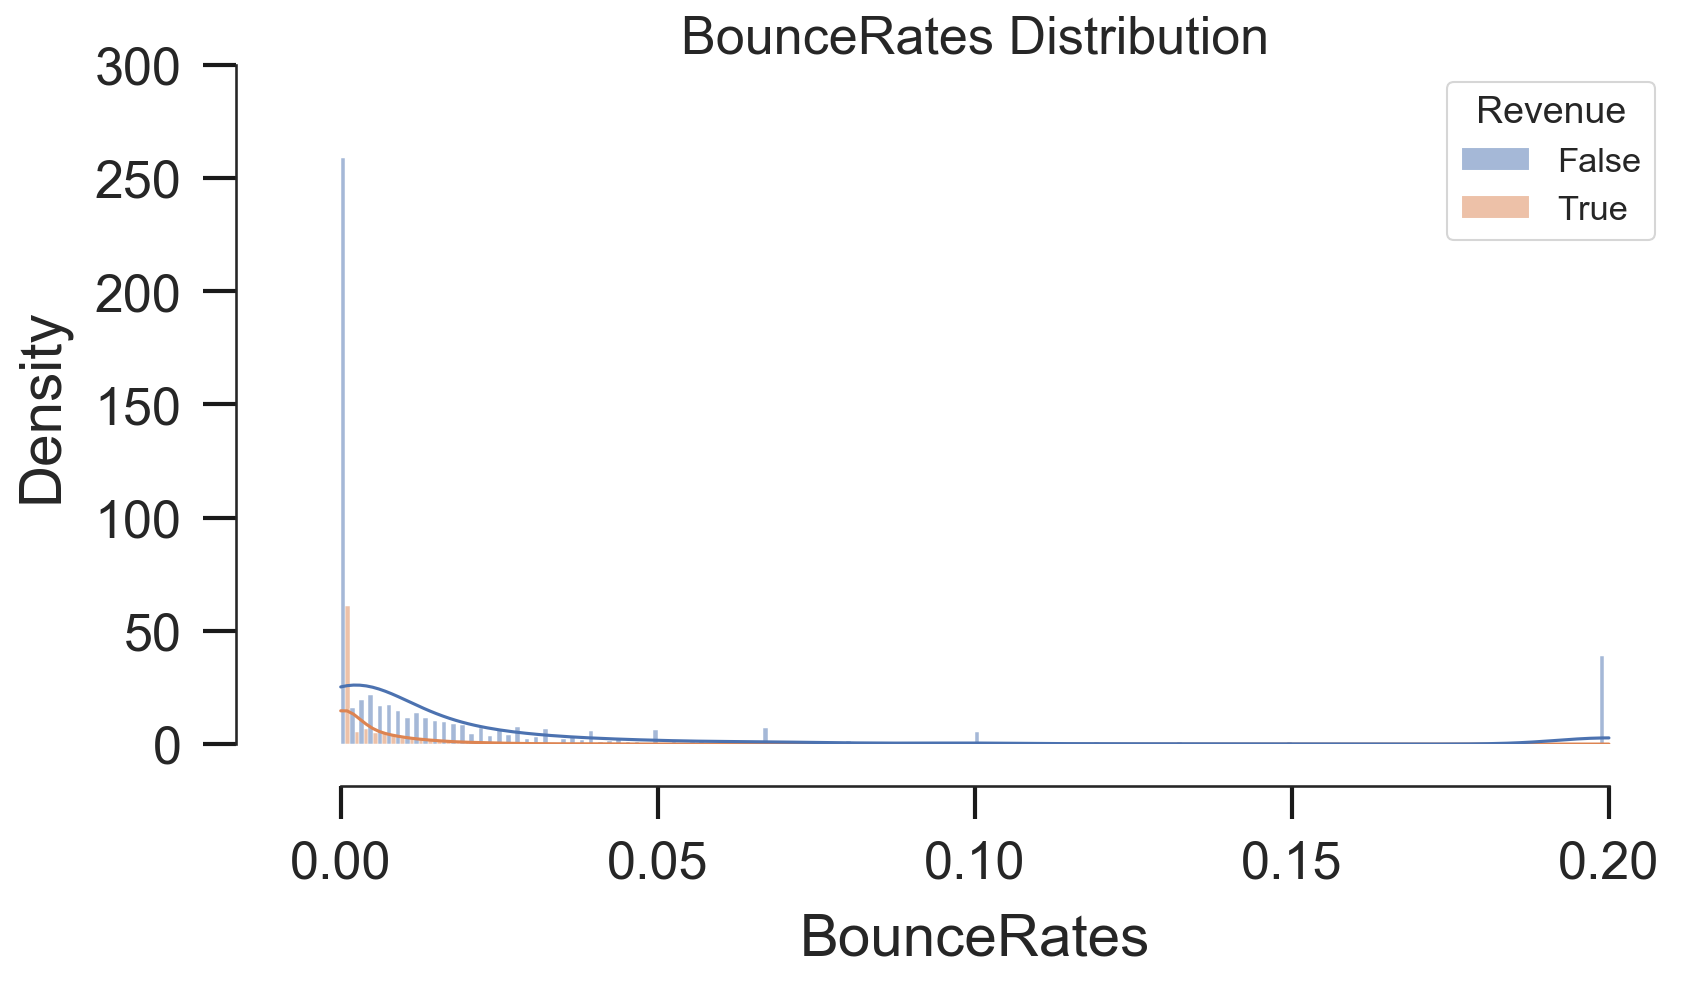

In [22]:
print('\n----------------Distribution of BounceRates----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat, x="BounceRates", stat = "density",hue='Revenue', multiple="dodge",kde = True)     
ax.set_xlabel("BounceRates",size = 28,labelpad=12)
ax.set_ylabel("Density",size = 28,labelpad=12)

ax.set_yticks([50*i for i in range(7)])

ax.spines['bottom'].set_bounds(0,0.2)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('BounceRates Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])

### ExitRates


----------------boxplot Distribution of ExitRates----------------



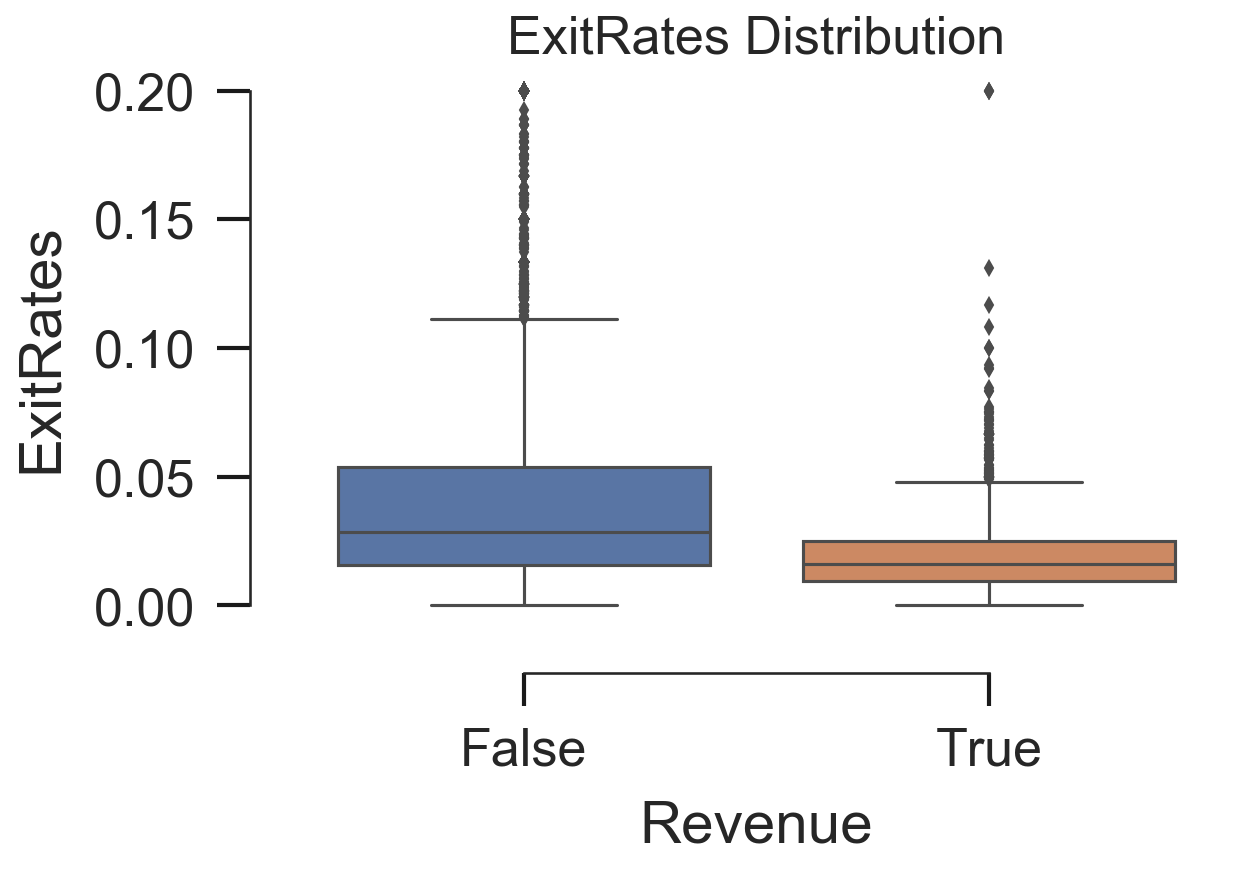

In [23]:
print('\n----------------boxplot Distribution of ExitRates----------------\n')
fig = plt.figure(figsize=(8,5), dpi=150)


ax = sns.boxplot(data = dat,x = "Revenue",y = "ExitRates")
ax.set_xlabel("Revenue",size = 28,labelpad=12)
ax.set_ylabel("ExitRates",size = 28,labelpad=12)

ax.spines['bottom'].set_bounds(0,1)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('ExitRates Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()


----------------Distribution of ExitRates----------------



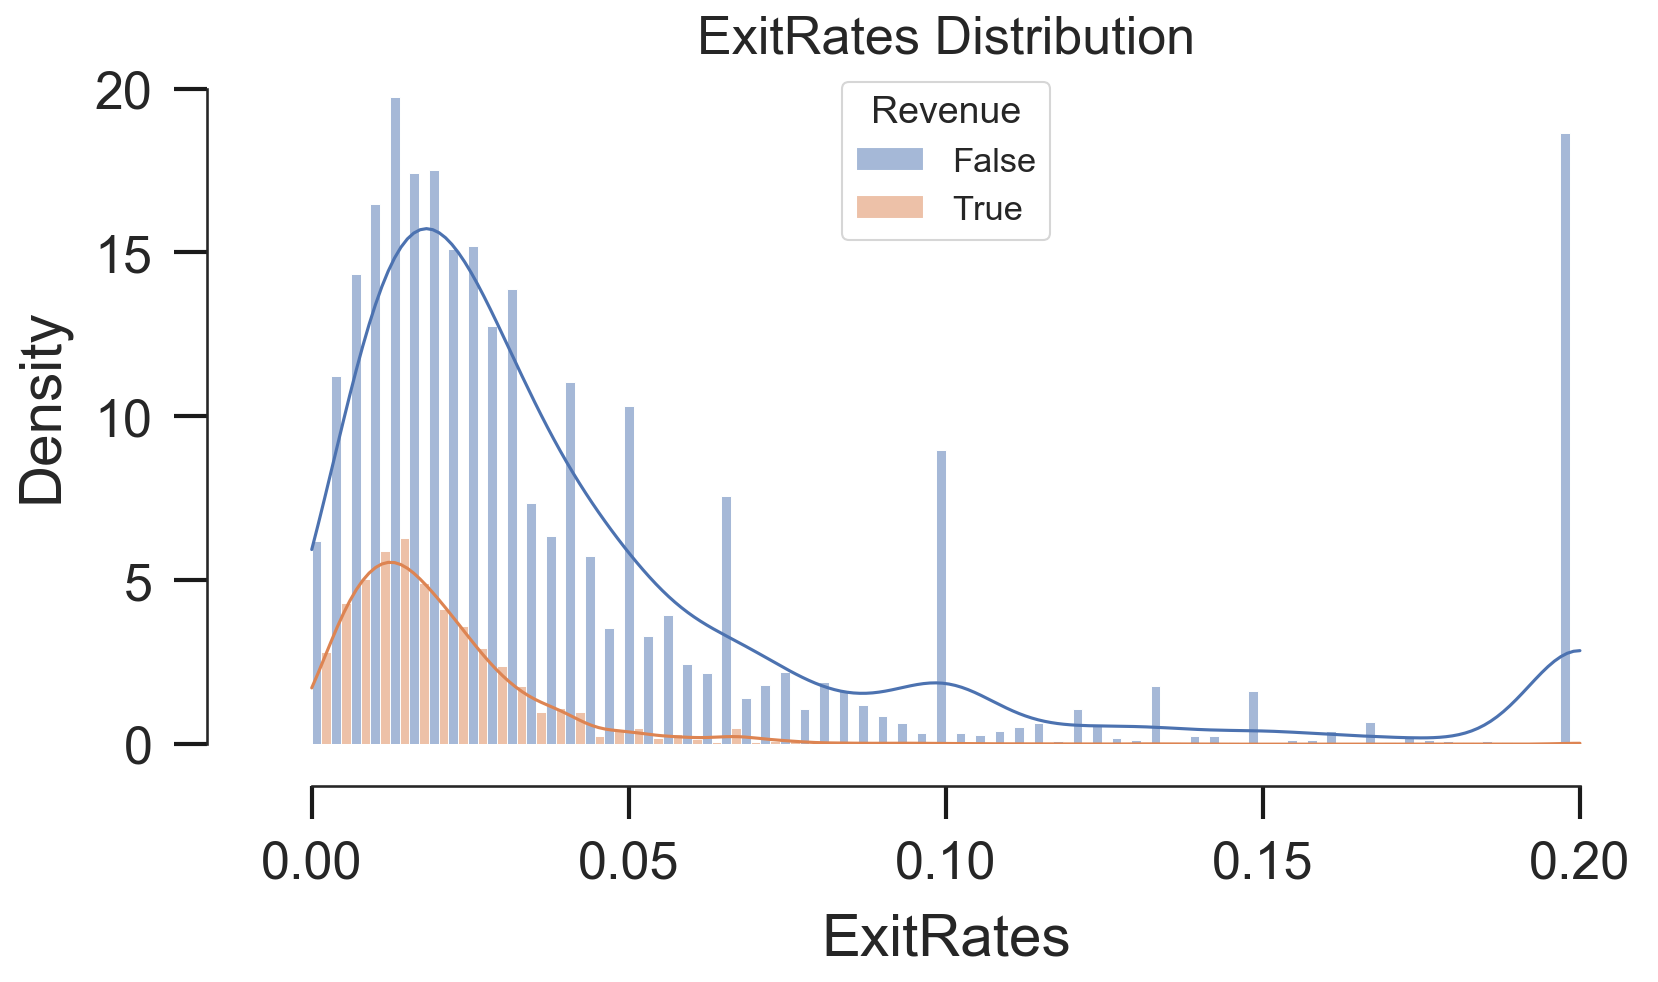

In [24]:
print('\n----------------Distribution of ExitRates----------------\n')
fig = plt.figure(figsize=(12,6), dpi=150)


ax = sns.histplot(dat, x="ExitRates", stat = "density",hue='Revenue', multiple="dodge",kde = True)     
ax.set_xlabel("ExitRates",size = 28,labelpad=12)
ax.set_ylabel("Density",size = 28,labelpad=12)

ax.set_yticks([5*i for i in range(5)])

ax.spines['bottom'].set_bounds(0,0.2)
ax.tick_params(axis= "x",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad = 10)
ax.tick_params(axis= "y",direction = 'out',which='major', length=16,width=2, color='k',labelsize = 25,pad= 10)
ax.set_title('ExitRates Distribution', fontsize=25)
adjust_spines(ax, ['left', 'bottom'])


plt.show()


# Data preprocessing

- Numeric variables were min-max scaled for effective training.
- Reduced the levels of categorical features by positive rate.

## Independent variables

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(dat.iloc[:,:10])
num_scale = pd.DataFrame(X_train_minmax,columns=list(dat.iloc[:,:10].columns))

In [26]:
num_scale

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0


## Categorical variables

In [27]:
dat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Month

In [28]:
## dat1 specifies the original data after data pre-processing
dat1 = dat.copy()

In [29]:
dat_month = dat[["Month","Revenue"]]
dat_month = dat_month.groupby("Month").mean().reset_index()
## Orginal month positive rate
dat_month

,Month,Revenue
0,Aug,0.175520
1,Dec,0.125072
2,Feb,0.016304
3,Jul,0.152778
4,June,0.100694
5,Mar,0.100682
6,May,0.108502
7,Nov,0.253502
8,Oct,0.209472
9,Sep,0.191964


- Aug, Sep have similar positive rate(0.18,0.19) 
- June,Mar,May have similar positive rate(0.10,0.10,0.10)
- Dec and Jul have similar positive rate(0.13,0.15)

In [30]:
## merge the categories with similar positive rate
dat1.loc[dat1["Month"].isin(["Aug","Sep"]),"Month"] = "Aug_Sep"
dat1.loc[dat1["Month"].isin(["Mar","May","June"]),"Month"] = "Mar_May_June"
dat1.loc[dat1["Month"].isin(["Jul","Dec"]),"Month"] = "Jul_Dec"

In [31]:
dat_month = dat1[["Month","Revenue"]]
dat_month = dat_month.groupby("Month").mean().reset_index()
## transformed month positive rate
dat_month

,Month,Revenue
0,Aug_Sep,0.183882
1,Feb,0.016304
2,Jul_Dec,0.130616
3,Mar_May_June,0.105415
4,Nov,0.253502
5,Oct,0.209472


- 1,2,8 have similar positive rate(0.15,0.15,0.16) 
- 2,4,5 have similar positive rate(0.17,0.18,0.17)
- 3,6 have similar positive rate(0.10,0.11)

### OperatingSystems

In [32]:
dat_opera = dat[["OperatingSystems","Revenue"]]
dat_opera = dat_opera.groupby("OperatingSystems").mean().reset_index()
## Orginal OperatingSystems positive rate
dat_opera

,OperatingSystems,Revenue
0,1,0.146615
1,2,0.174973
2,3,0.104892
3,4,0.177824
4,5,0.166667
5,6,0.105263
6,7,0.142857
7,8,0.215190


In [33]:
## merge the categories with similar positive rate
dat1.loc[dat1["OperatingSystems"].isin(["1","7"]),"OperatingSystems"] = "1_7"
dat1.loc[dat1["OperatingSystems"].isin(["2","4","5"]),"OperatingSystems"] = "2_4_5"
dat1.loc[dat1["OperatingSystems"].isin(["3","6"]),"OperatingSystems"] = "3_6"

In [34]:
dat_opera = dat1[["OperatingSystems","Revenue"]]
dat_opera = dat_opera.groupby("OperatingSystems").mean().reset_index()
dat_opera

,OperatingSystems,Revenue
0,2,0.174973
1,3,0.104892
2,4,0.177824
3,5,0.166667
4,6,0.105263
5,8,0.215190
6,1_7,0.146605


### Browser

- 1,2,8 have similar positive rate(0.15,0.15,0.16) 
- 2,4,5 have similar positive rate(0.17,0.18,0.17)
- 3,6 have similar positive rate(0.10,0.11)

In [35]:
dat_Browser = dat[["Browser","Revenue"]]
dat_Browser = dat_Browser.groupby("Browser").mean().reset_index()
## Orginal Browser positive rate
dat_Browser

,Browser,Revenue
0,1,0.148253
1,2,0.153624
2,3,0.047619
3,4,0.176630
4,5,0.184154
5,6,0.114943
6,7,0.122449
7,8,0.155556
8,9,0.000000
9,10,0.196319


In [36]:
## merge the categories with similar positive rate
dat1.loc[dat1["Browser"].isin(["1","2","8"]),"Browser"] = "1_2_8"
dat1.loc[dat1["Browser"].isin(["4","5","9","11"]),"Browser"] = "4_5_9_11"
dat1.loc[dat1["Browser"].isin(["6","7"]),"Browser"] = "6_7"
dat1.loc[dat1["Browser"].isin(["12","13"]),"Browser"] = "12_13"

In [37]:
dat_Browser = dat1[["Browser","Revenue"]]
dat_Browser = dat_Browser.groupby("Browser").mean().reset_index()
## Orginal Browser positive rate
dat_Browser

,Browser,Revenue
0,3,0.047619
1,4,0.176630
2,5,0.184154
3,6,0.114943
4,7,0.122449
5,9,0.000000
6,10,0.196319
7,11,0.166667
8,12,0.300000
9,13,0.262295


### Region

- Since the positive rate difference across Regions is within 0.04, we decided to drop this variable

In [38]:
dat_Region = dat[["Region","Revenue"]]
dat_Region = dat_Region.groupby("Region").mean().reset_index()
## Orginal Browser positive rate
dat_Region

,Region,Revenue
0,1,0.161297
1,2,0.165493
2,3,0.145235
3,4,0.148054
4,5,0.163522
5,6,0.139130
6,7,0.156373
7,8,0.129032
8,9,0.168297


### TrafficType

- The variable is quite unbalanced so we decided to disregard it for now.

In [39]:
dat["TrafficType"].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [40]:
dat_Region = dat[["TrafficType","Revenue"]]
dat_Region = dat_Region.groupby("TrafficType").mean().reset_index()
## Orginal Browser positive rate
dat_Region

,TrafficType,Revenue
0,1,0.106895
1,2,0.216458
2,3,0.087719
3,4,0.154350
4,5,0.215385
5,6,0.119369
6,7,0.300000
7,8,0.276968
8,9,0.095238
9,10,0.200000


### VisitorType

- We decided not to merge any category for VisitorType

In [41]:
dat_VisitorType = dat[["VisitorType","Revenue"]]
dat_VisitorType = dat_VisitorType.groupby("VisitorType").mean().reset_index()
## Orginal Browser positive rate
dat_VisitorType

,VisitorType,Revenue
0,New_Visitor,0.249115
1,Other,0.188235
2,Returning_Visitor,0.139323


### Weekend

- it seems that Weekend is a weak variable

In [42]:
dat_weekend = dat[["Weekend","Revenue"]]
dat_weekend = dat_weekend.groupby("Weekend").mean().reset_index()
## Orginal Browser positive rate
dat_weekend

,Weekend,Revenue
0,False,0.148911
1,True,0.173989


In [43]:
dat1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1_7,1_2_8,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,1_2_8,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1_2_8,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,1_2_8,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Jul_Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,1_2_8,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,1_2_8,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,1_2_8,3,11,Returning_Visitor,False,False


In [44]:
dat_cat = dat1.iloc[:,10:]

In [45]:
dat2 = pd.concat([num_scale, dat_cat],axis=1)

In [46]:
dat2.drop(["Weekend","VisitorType","Informational_Duration","ProductRelated_Duration","BounceRates"],axis=1,inplace = True)

In [47]:
dat2.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
ProductRelated             float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                       int64
TrafficType                  int64
Revenue                       bool
dtype: object

## Oversampling

In [48]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

## Distribution of independent variables (Categorical)

In [64]:
dat2.iloc[:,7:12] = dat2.iloc[:,7:12].astype('str')
dat2.iloc[:,7:12].dtypes

Month               object
OperatingSystems    object
Browser             object
Region              object
TrafficType         object
dtype: object

# Multivariate analysis

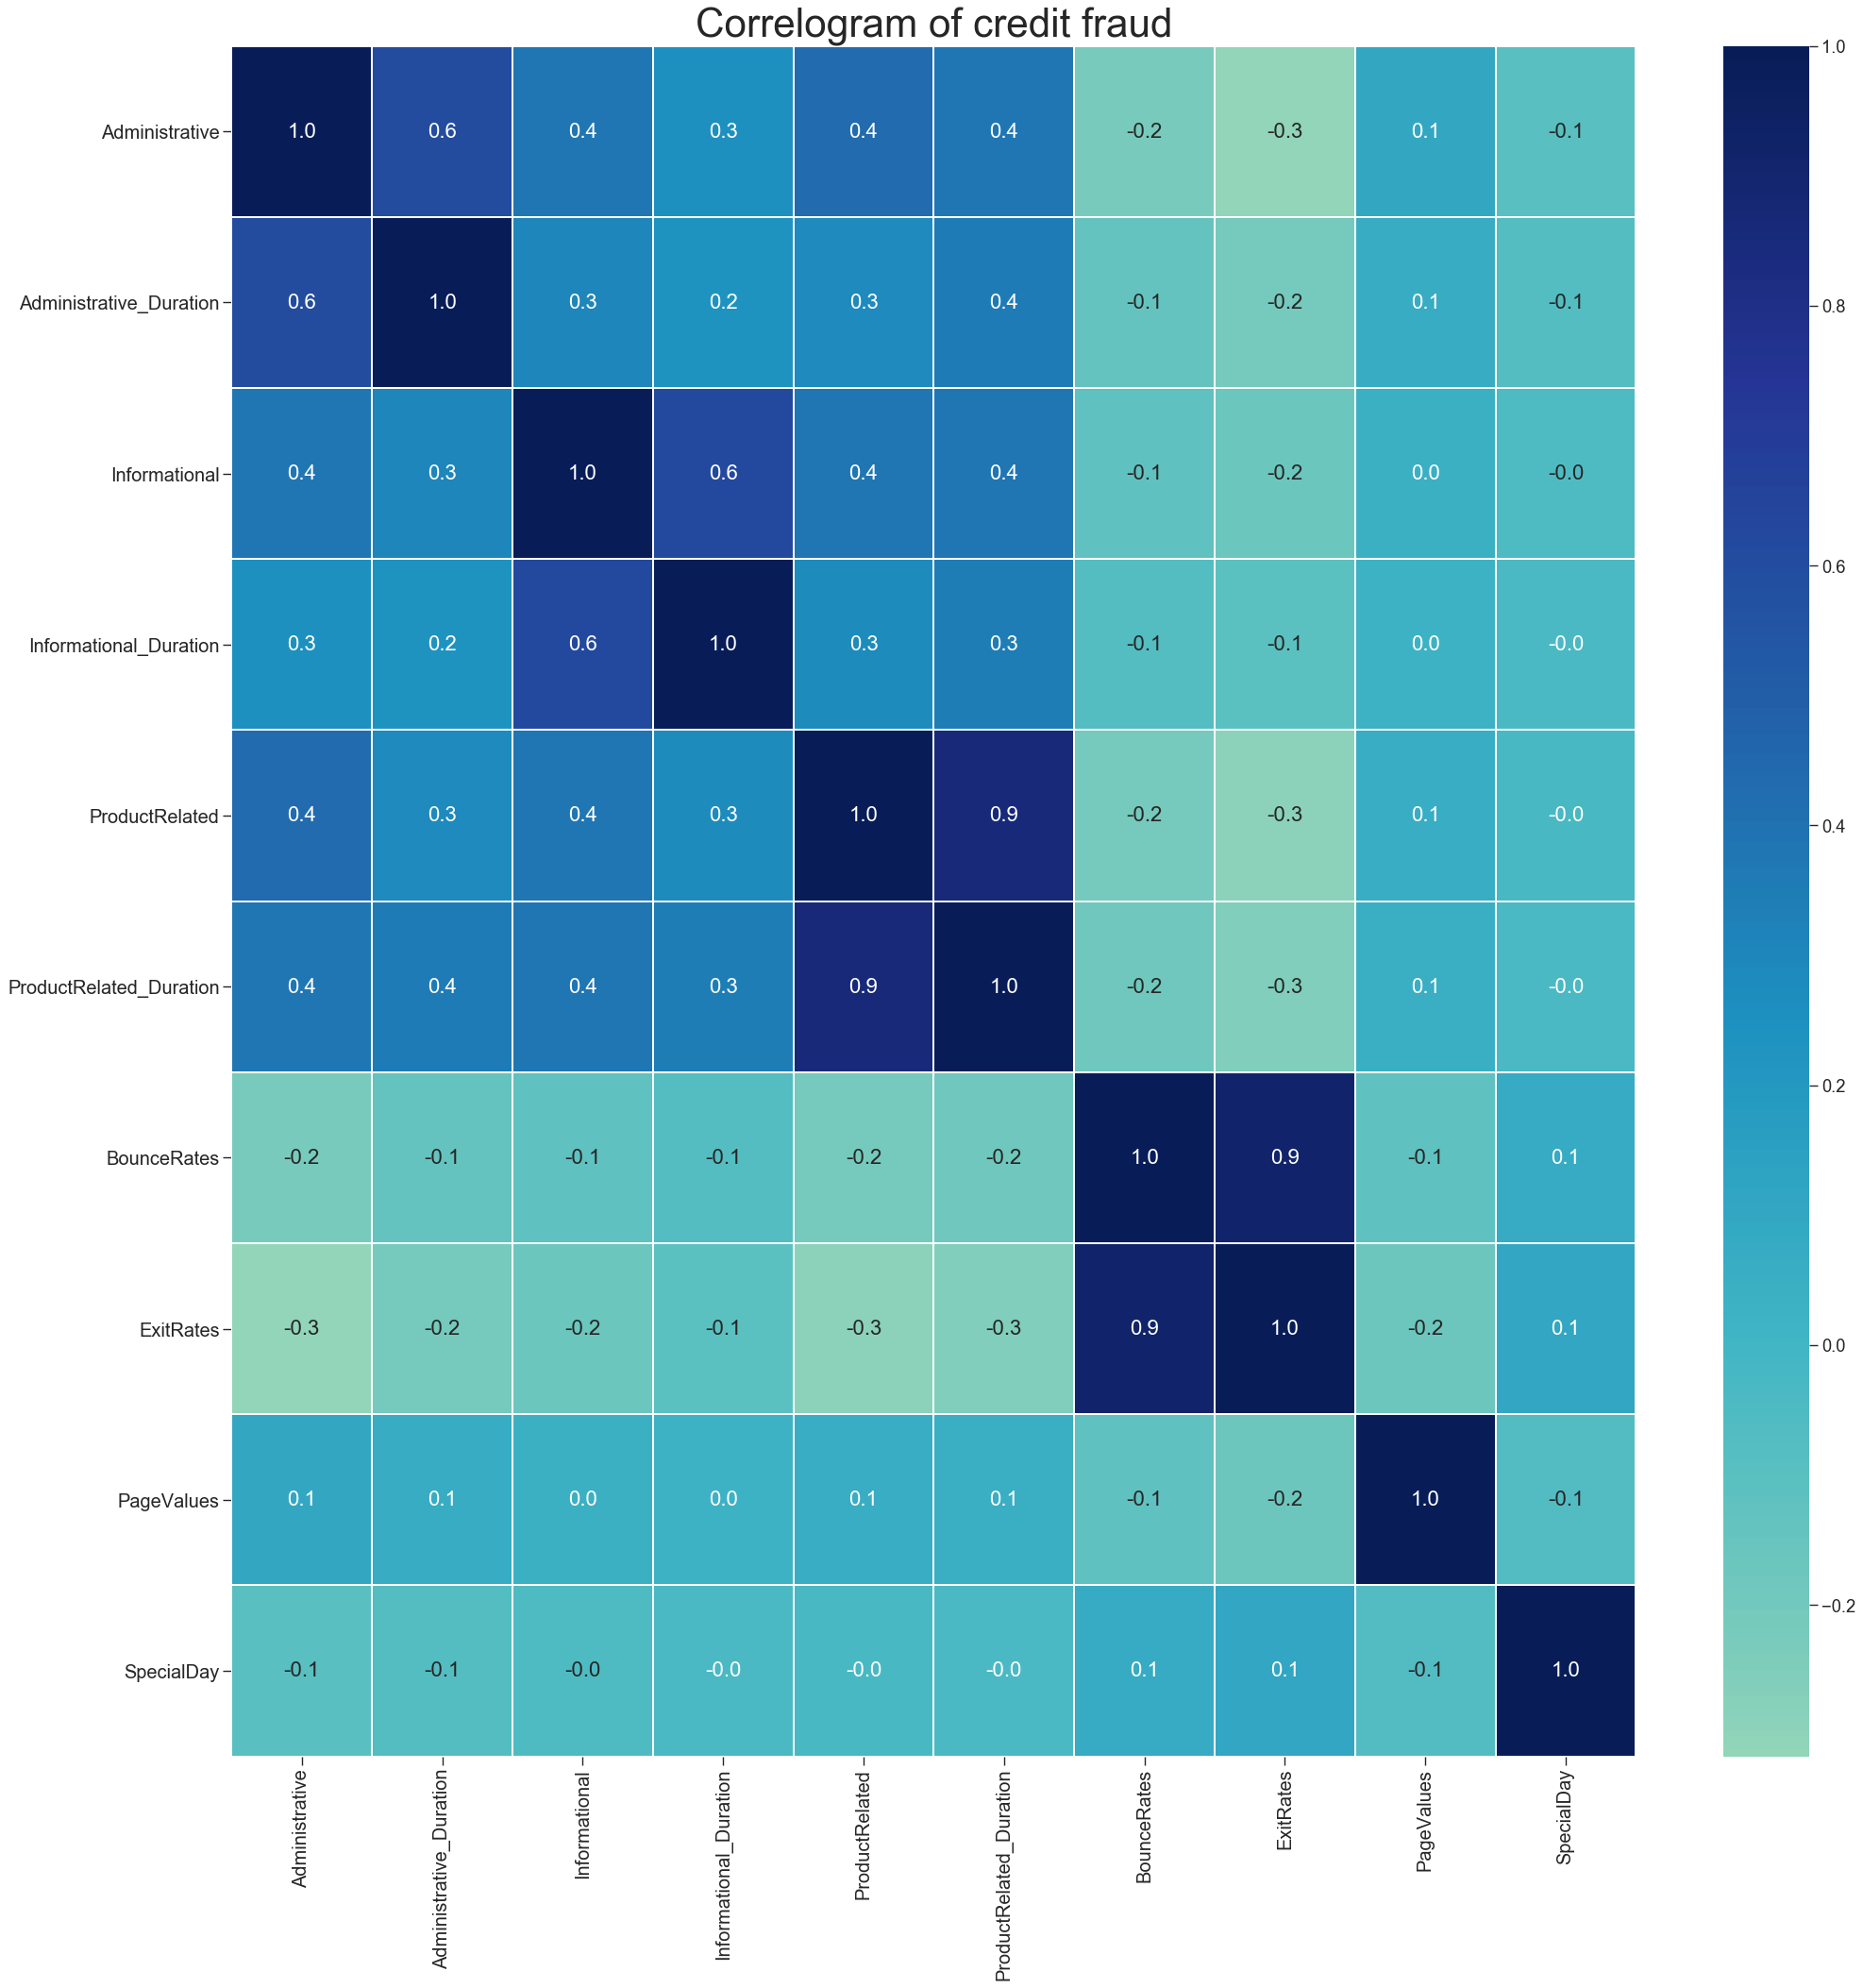

In [50]:
# Plot
plt.figure(figsize=(30,30), dpi= 80)

pd.options.display.float_format = '{:.2f}'.format

## Extract all freatures
df = dat.iloc[:,:10]

sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns,cmap="YlGnBu",center = 0,linewidths=.8, annot=True, fmt='.1f', annot_kws={"size": 20})

# Decorations
plt.title('Correlogram of credit fraud', fontsize=38)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Statistical computing (ignore for now)

## pearson correlation

In [271]:
stats.pearsonr(np.array(dat["ProductRelated"]), np.array(dat["ProductRelated_Duration"]))

(0.8609268361763713, 0.0)

In [273]:
stats.kruskal(np.array(dat["ProductRelated"]),np.array(dat["Revenue"]))

KruskalResult(statistic=19593.796394184137, pvalue=0.0)

# Modelling

- we decided to use AUC as the evaluation metric for our models because the class label is balanced after sythetic oversampling.
- we selected logistic regresion, random forest, gradient boosting, and support vector machine as the potential predictive models.
-  correlated numeric variables were cut out.
- categorical variables were encoded. (one hot encoding)
- we used random search to find the best subset of hyperparameters for random forest, gradient boosting and support vector machine with 3 fold cross validation.

## Logistic regression

In [56]:
dat2

,Administrative,Administrative_Duration,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Feb,1_7,1_2_8,1,1,False
1,0.00,0.00,0.00,0.00,0.50,0.00,0.00,Feb,2,1_2_8,1,2,False
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Feb,4,1_2_8,9,3,False
3,0.00,0.00,0.00,0.00,0.70,0.00,0.00,Feb,3,1_2_8,2,4,False
4,0.00,0.00,0.00,0.01,0.25,0.00,0.00,Feb,3,3,1,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.11,0.04,0.00,0.08,0.15,0.03,0.00,Jul_Dec,4,6,1,1,False
12326,0.00,0.00,0.00,0.01,0.11,0.00,0.00,Nov,3,1_2_8,1,8,False
12327,0.00,0.00,0.00,0.01,0.43,0.00,0.00,Nov,3,1_2_8,1,13,False
12328,0.15,0.02,0.00,0.02,0.11,0.00,0.00,Nov,2,1_2_8,3,11,False


In [65]:
X = dat2.drop(["Revenue"],axis=1)
X = pd.get_dummies(X,prefix = ["Month","OperatingSystems","Browser","Region","TrafficType"])
y = dat["Revenue"]

In [157]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, MaxAbsScaler
## define a logistic classifier
logreg = LogisticRegression()


imba_pipeline = make_pipeline(SMOTE(random_state=42),
                     PolynomialFeatures(interaction_only=True), 
                     logreg)
param_grid = {'polynomialfeatures__degree': [2]}


random_params, random_score = hypertuning_rscv(imba_pipeline, param_grid, nbr_iter,X,y)

C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=200. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [159]:
clf = LogisticRegression()

imba_pipeline = make_pipeline(SMOTE(random_state=42),PolynomialFeatures(interaction_only=True), clf)

cv_results_auc_log = cross_val_score(imba_pipeline, X, y, scoring='roc_auc', cv=kf)
cv_results_precision_log = cross_val_score(imba_pipeline, X, y, scoring='precision', cv=kf)
cv_results_recall_log = cross_val_score(imba_pipeline, X, y, scoring='recall', cv=kf)
cv_results_f1_log = cross_val_score(imba_pipeline, X, y, scoring='f1', cv=kf)

C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [165]:
print("The results from the optimal subset of hyperparameters are AUC:{},Precision:{},Recall:{},F1_score:{}".format(round(cv_results_auc_log.mean(),2),round(cv_results_precision_log.mean(),2),round(cv_results_recall_log.mean(),2),round(cv_results_f1_log.mean(),2)))

The results from the optimal subset of hyperparameters are AUC:0.85,Precision:0.53,Recall:0.6,F1_score:0.55


## Random forest


In [66]:
## function of getting the optimized paramters and score
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=3)
    
    #CV = Cross-Validation (here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [67]:
# initialize k folds
kf = KFold(n_splits=10, random_state=42, shuffle=False)
est = RandomForestClassifier()

C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [91]:
param_grid = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2,3,5,6,8,10,12],
    'bootstrap': [True],
    'max_depth': [i for i in range(1,6)],
    'min_samples_leaf': [3,4,5,6,7],
    'min_samples_split': [2,3,5,6],
    'n_estimators': [300,500,800],
    "class_weight":["balanced","balanced_subsample"]
}

new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
imba_pipeline = make_pipeline(SMOTE(random_state=42),RandomForestClassifier(random_state=13))
nbr_iter = 200
random_params, random_score = hypertuning_rscv(imba_pipeline, new_params, nbr_iter,X,y)

In [92]:
random_params

{'randomforestclassifier__n_estimators': 300,
 'randomforestclassifier__min_samples_split': 6,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__bootstrap': True}

In [107]:
clf = RandomForestClassifier(n_estimators = 300,
 min_samples_split = 6,
 min_samples_leaf = 4,
 max_depth = 5,
 criterion = 'gini',
 class_weight = "balanced_subsample",
 bootstrap = True,
 n_jobs=-1)

imba_pipeline = make_pipeline(SMOTE(random_state=42),clf)

cv_results_auc_rf = cross_val_score(imba_pipeline, X, y, scoring='roc_auc', cv=kf)
cv_results_precision_rf = cross_val_score(imba_pipeline, X, y, scoring='precision', cv=kf)
cv_results_recall_rf = cross_val_score(imba_pipeline, X, y, scoring='recall', cv=kf)
cv_results_f1_rf = cross_val_score(imba_pipeline, X, y, scoring='f1', cv=kf)

#### Hyperparameter tuning results for random forest

In [112]:
print("The results from the optimal subset of hyperparameters are AUC:{},Precision:{},Recall:{},F1_score:{}".format(round(cv_results_auc_rf.mean(),2),round(cv_results_precision_rf.mean(),2),round(cv_results_recall_rf.mean(),2),round(cv_results_f1_rf.mean(),2)))

The results from the optimal subset of hyperparameters are AUC:0.89,Precision:0.55,Recall:0.84,F1_score:0.66


## Gradient boosting

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
p_distr ={
        "learning_rate":[1, 0.5, 0.25, 0.1, 0.05, 0.01],
        'n_estimators': [200,400,600,800,1000],
        'max_depth':np.linspace(1, 13, 13, endpoint=True), 
        'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
        "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features':list(range(1,dat2.shape[1]))
        
}

new_params = {'gradientboostingclassifier__' + key: p_distr[key] for key in p_distr}
est =  GradientBoostingClassifier(random_state=13)
nbr_iter = 200
imba_pipeline = make_pipeline(SMOTE(random_state=42),est)

random_params, random_score = hypertuning_rscv(imba_pipeline, new_params,nbr_iter,X,y)

In [134]:
random_params

{'gradientboostingclassifier__n_estimators': 600,
 'gradientboostingclassifier__min_samples_split': 0.5,
 'gradientboostingclassifier__min_samples_leaf': 0.2,
 'gradientboostingclassifier__max_features': 7,
 'gradientboostingclassifier__max_depth': 13.0,
 'gradientboostingclassifier__learning_rate': 0.5}

In [135]:
clf = GradientBoostingClassifier(
 n_estimators = 600,
 min_samples_split = 0.5,
 min_samples_leaf = 0.2,
 max_features = 7,
 max_depth = 13,
 learning_rate = 0.5)


imba_pipeline = make_pipeline(SMOTE(random_state=42),clf)

cv_results_auc_gb = cross_val_score(imba_pipeline, X, y, scoring='roc_auc', cv=kf)
cv_results_precision_gb = cross_val_score(imba_pipeline, X, y, scoring='precision', cv=kf)
cv_results_recall_gb = cross_val_score(imba_pipeline, X, y, scoring='recall', cv=kf)
cv_results_f1_gb = cross_val_score(imba_pipeline, X, y, scoring='f1', cv=kf)

#### Hyperparameter tuning results for random forest

In [141]:
print("The results from the optimal subset of hyperparameters are AUC:{},Precision:{},Recall:{},F1_score:{}".format(round(cv_results_auc_gb.mean(),2),round(cv_results_precision_gb.mean(),2),round(cv_results_recall_gb.mean(),2),round(cv_results_f1_gb.mean(),2)))

The results from the optimal subset of hyperparameters are AUC:0.92,Precision:0.59,Recall:0.79,F1_score:0.68


## Support vector classifier

In [144]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ["linear", "poly", "rbf", "sigmoid"]}  
  
est =  SVC()
nbr_iter = 120

new_params = {'svc__' + key: param_grid[key] for key in param_grid}
est =  SVC()
nbr_iter = 200
imba_pipeline = make_pipeline(SMOTE(random_state=42),est)
random_params, random_score = hypertuning_rscv(imba_pipeline, new_params,nbr_iter,X,y)

C:\Users\xfu3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 100 is smaller than n_iter=200. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [145]:
random_params

{'svc__kernel': 'rbf', 'svc__gamma': 1, 'svc__C': 1000}

In [146]:
clf = SVC(
 C = 1000,
 gamma = 1,
 kernel = 'rbf')


imba_pipeline = make_pipeline(SMOTE(random_state=42),clf)

cv_results_auc_svc = cross_val_score(imba_pipeline, X, y, scoring='roc_auc', cv=kf)
cv_results_precision_svc = cross_val_score(imba_pipeline, X, y, scoring='precision', cv=kf)
cv_results_recall_svc = cross_val_score(imba_pipeline, X, y, scoring='recall', cv=kf)
cv_results_f1_svc = cross_val_score(imba_pipeline, X, y, scoring='f1', cv=kf)

In [147]:
print("The results from the optimal subset of hyperparameters are AUC:{},Precision:{},Recall:{},F1_score:{}".format(round(cv_results_auc_svc.mean(),2),round(cv_results_precision_svc.mean(),2),round(cv_results_recall_svc.mean(),2),round(cv_results_f1_svc.mean(),2)))

The results from the optimal subset of hyperparameters are AUC:0.74,Precision:0.47,Recall:0.45,F1_score:0.46
